## 金融风控项目task2

### 学习目标

  -  学习如何对数据集整体概况进行分析，包括数据集的基本情况（缺失值，异常值）
  -  学习了解变量间的相互关系、变量与预测值之间的存在关系
  - 完成相应学习打卡任务



### 学习内容

 -  数据总体了解：
        读取数据集并了解数据集大小，原始特征维度；
        通过info熟悉数据类型；
        粗略查看数据集中各特征基本统计量；
 -  缺失值和唯一值：
        查看数据缺失值情况
        查看唯一值特征情况
 -  深入数据-查看数据类型
        类别型数据
        数值型数据
            离散数值型数据
            连续数值型数据
 - 数据间相关关系
        特征和特征之间关系
        特征和目标变量之间关系
 -  用pandas_profiling生成数据报告


### 数据导入


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [127]:


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
train_data = pd.read_csv('./train-1.csv')
data_test_a= pd.read_csv('./testA.csv')

In [56]:
print('train_date shape:', train_data.shape)
print('train date shape',testA.shape)

train_date shape: (800000, 47)
train date shape (200000, 46)


In [57]:
#查看标签名称
train_data.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [62]:
#info函数查看每一列的null情况和数据类型
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [63]:
#基本数据统计量
train_data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,799761.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799595.000000,8.000000e+05,799469.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.0,759730.000000,759730.000000,759730.000000,759730.000000,766761.000000,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,1754.113589,1.0,0.511932,3.642330,5.642648,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,2.367453,200.037446,11.036679,11.150155,0.880325,31.865995,31.866674,5.475286,0.606467,0.377471,2.245802e+04,24.516126,11.999201,0.493055,0.137464,7941.474040,0.0,1.333266,2.246825,3.302810,3.302810,2.949969,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,0.000000,103.000000,8.000000,11.790000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.944000e+03,33.400000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,203.000000,14.000000,17.610000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.973400e+04,70.700000,32.000000,1.000000,0.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,86.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,1.0,51.000000,33.000000,63.000000,63.000000,49.000000,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [66]:
train_data.head(3).append(train_data.tail(3))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,65000.0,2,2015-10-01,1,0,47.0,17,12.11,1.0,670.0,674.0,5.0,0.0,0.0,6381.0,51.9,36.0,1,0,Jul-2002,0.0,1.0,2.0,1.0,4.0,4.0,1.0,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,96000.0,2,2015-02-01,0,4,34.0,18,29.25,0.0,675.0,679.0,16.0,0.0,0.0,69702.0,61.3,37.0,1,0,Jan-1994,4.0,1.0,0.0,5.0,8.0,8.0,7.0,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,120000.0,0,2018-08-01,0,4,62.0,13,8.99,0.0,695.0,699.0,7.0,0.0,0.0,8420.0,72.6,13.0,0,0,Feb-2002,4.0,1.0,2.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [76]:
print(f'There are {train_data.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


In [89]:
have_null_fea_dict = (train_data.isnull().sum()/len(train_data)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value
  

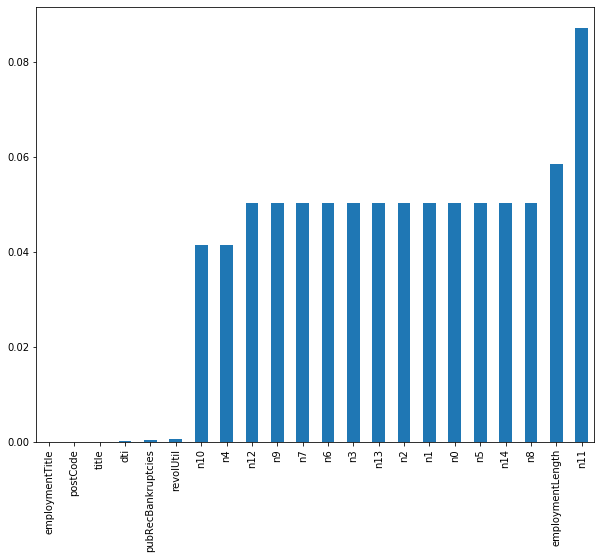

In [94]:
# nan可视化
missing = train_data.isnull().sum()/len(train_data)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [111]:
#只要一个值的属性
one_value_fea = [col for col in train_data.columns if train_data[col].nunique() <= 1]

In [116]:
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]

In [117]:
one_value_fea

['policyCode']

In [118]:
one_value_fea_test

['policyCode']

In [119]:
#只有一个维度的值是单一值
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_fea_test)} columns in test dataset with one unique value.')

There are 1 columns in train dataset with one unique value.
There are 1 columns in test dataset with one unique value.


In [122]:
#查看数值型和类别行（离散）的标签
numerical_fea = list(train_data.select_dtypes(exclude=['object']).columns)  #object
category_fea = list(filter(lambda x: x not in numerical_fea,list(train_data.columns)))

In [123]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [124]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [128]:
train_data.grade

0         E
1         D
2         D
3         A
4         C
         ..
799995    C
799996    A
799997    C
799998    A
799999    B
Name: grade, Length: 800000, dtype: object

In [130]:
#将数值型变量区分为连续和离散型
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(train_data,numerical_fea)



In [131]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [133]:
train_data['term'].value_counts()#离散型变量

3    606902
5    193098
Name: term, dtype: int64

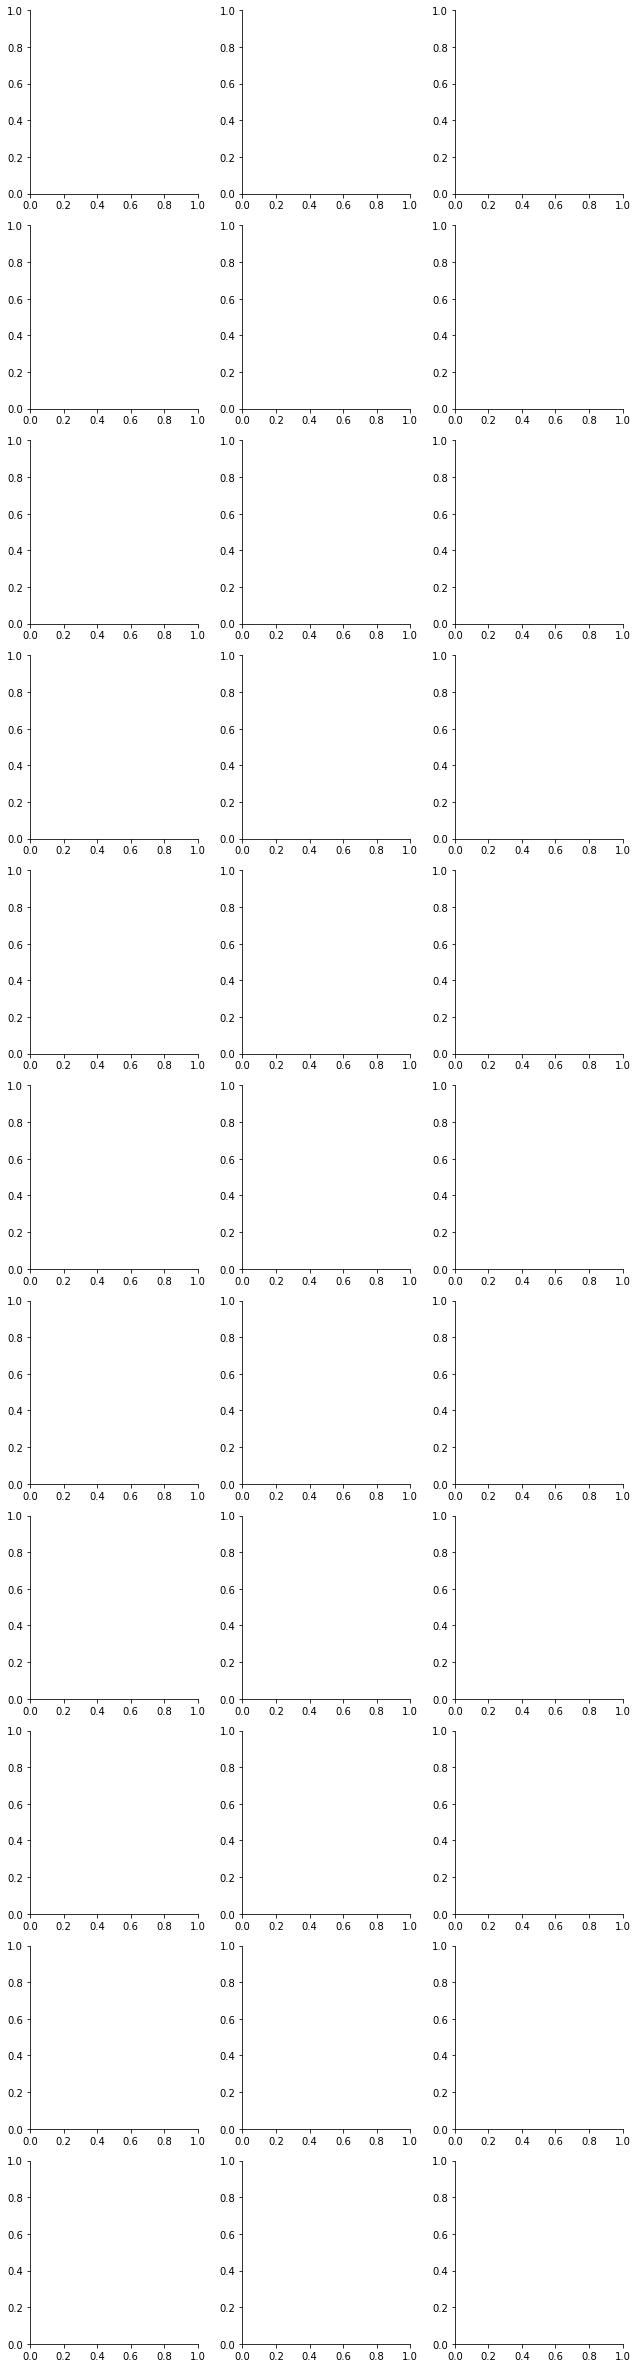

In [159]:
#数值连续型变量分析
#每个数字特征得分布可视化
f = pd.melt(train_data, value_vars=numerical_serial_fea)  #melt把Dataframe展平
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
#g = g.map(sns.distplot, "value")


<Figure size 1152x864 with 0 Axes>

Text(0.5, 0.98, 'Transaction Values Distribution')

Text(0.5, 1.0, 'loanAmnt Distribuition')

Text(0.5, 0, '')

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'loanAmnt (Log) Distribuition')

Text(0.5, 0, '')

Text(0, 0.5, 'Probability')

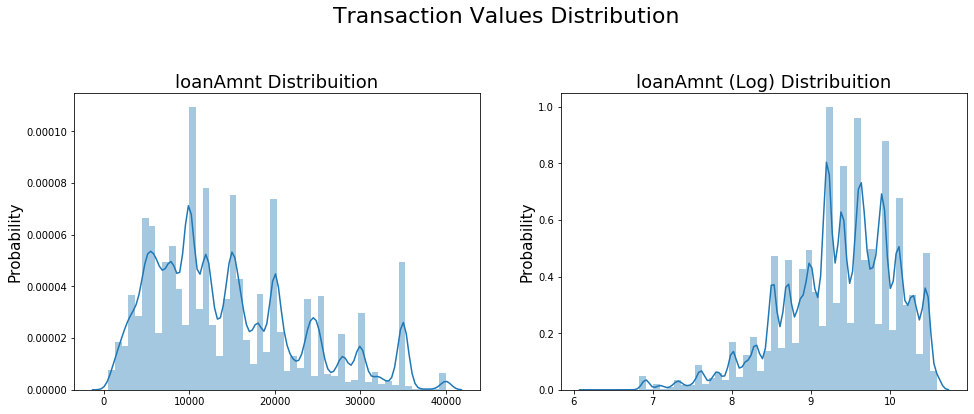

In [161]:
#Ploting Transaction Amount Values Distribution
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(train_data['loanAmnt'])
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(train_data['loanAmnt']))
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

In [144]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},'B': {0: 1, 1: 3, 2: 5},'C': {0: 2, 1: 4, 2: 6}})

In [155]:
pd.melt(df,value_vars=['A','B','C'])

,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


In [164]:
#透视图 索引可以有多个，“columns（列）”是可选的，聚合函数aggfunc最后是被应用到了变量“values”中你所列举的项目上。
pivot = pd.pivot_table(train_data, index=['grade'], columns=['issueDate'], values=['loanAmnt'], aggfunc=np.sum)

In [165]:
pivot

loanAmnt                                                         \
issueDate 2007-06-01 2007-07-01 2007-08-01 2007-09-01 2007-10-01 2007-11-01   
grade                                                                         
A                NaN    53650.0    42000.0    19500.0    34425.0    63950.0   
B                NaN    13000.0    24000.0    32125.0     7025.0    95750.0   
C                NaN    68750.0     8175.0    10000.0    61800.0    52550.0   
D                NaN        NaN     5500.0     2850.0    28625.0        NaN   
E             7500.0        NaN    10000.0        NaN    17975.0     1500.0   
F                NaN        NaN    31250.0     2125.0        NaN        NaN   
G                NaN        NaN        NaN        NaN        NaN        NaN   

                                                                             \
issueDate 2007-12-01 2008-01-01 2008-02-01 2008-03-01 2008-04-01 2008-05-01   
grade                                                                         
A            43500.0   168825.0    85600.0   101825.0    99175.0    64700.0   
B           164300.0   303175.0   434425.0   538450.0   364700.0    52300.0   
C           175375.0   151100.0   243725.0   393150.0   240550.0    54800.0   
D           167975.0   171325.0   192900.0   269325.0   113100.0    37500.0   
E            94375.0   116450.0    42000.0   139775.0    43575.0    23500.0   
F                NaN    49000.0    27000.0    43000.0    20000.0        NaN   
G                NaN    24625.0        NaN        NaN        NaN        NaN   

                                                                             \
issueDate 2008-06-01 2008-07-01 2008-08-01 2008-09-01 2008-10-01 2008-11-01   
grade                                                                         
A            16300.0    64500.0    35000.0    40100.0    67850.0   105000.0   
B            69550.0   110600.0    57500.0    22200.0   155875.0   487275.0   
C            77650.0   117800.0    72400.0    45500.0   158850.0   180850.0   
D            22500.0    40500.0    34600.0        NaN    80100.0   193875.0   
E                NaN     8500.0     7500.0        NaN    39000.0   109000.0   
F                NaN        NaN    10500.0     4250.0        NaN        NaN   
G                NaN        NaN        NaN        NaN        NaN        NaN   

                                                                             \
issueDate 2008-12-01 2009-01-01 2009-02-01 2009-03-01 2009-04-01 2009-05-01   
grade                                                                         
A           228375.0   284900.0   286650.0   315200.0   359775.0   333300.0   
B           470875.0   374450.0   138600.0   130700.0   240800.0   757150.0   
C           445850.0   347850.0   516425.0   596900.0   375150.0   472900.0   
D           149250.0   270525.0   306375.0   346025.0   338000.0   150400.0   
E            72750.0    52250.0   188650.0   125500.0   139500.0   157450.0   
F            21000.0    14000.0    20000.0    18000.0    49200.0    55600.0   
G                NaN        NaN        NaN        NaN        NaN        NaN   

                                                                             \
issueDate 2009-06-01 2009-07-01 2009-08-01 2009-09-01 2009-10-01 2009-11-01   
grade                                                                         
A           328400.0   435650.0   430575.0   540350.0   403200.0   612075.0   
B           687000.0   690325.0   828175.0  1025575.0  1054125.0  1128625.0   
C           442400.0   541050.0   525100.0   776550.0   849625.0   844250.0   
D           153900.0   187475.0   177975.0   257750.0   551425.0   870700.0   
E            50400.0   104700.0   164200.0   266375.0   264200.0   245500.0   
F            15000.0    92800.0    40175.0    48000.0    52650.0    64500.0   
G            14600.0    50000.0     7750.0     5000.0    15000.0    44750.0   

                                                         

In [167]:
!pip install pandas_profiling

     |████████████████████████████████| 258 kB 13 kB/s eta 0:00:012
     |████████████████████████████████| 10.4 MB 23 kB/s eta 0:00:018    |███████▌                        | 2.4 MB 12 kB/s eta 0:11:00
     |████████████████████████████████| 64 kB 18 kB/s eta 0:00:01
     |████████████████████████████████| 283 kB 18 kB/s eta 0:00:017
     |████████████████████████████████| 8.5 MB 12 kB/s eta 0:00:0114
     |████████████████████████████████| 599 kB 14 kB/s eta 0:00:015
     |████████████████████████████████| 64 kB 20 kB/s eta 0:00:01
     |████████████████████████████████| 69 kB 11 kB/s  eta 0:00:01
     |████████████████████████████████| 61 kB 17 kB/s eta 0:00:016
     |████████████████████████████████| 3.1 MB 12 kB/s eta 0:00:0141
     |████████████████████████████████| 291 kB 10 kB/s eta 0:00:01
     |████████████████████████████████| 156 kB 13 kB/s eta 0:00:01


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=de9cc4ca987dd6bc3b27a9bea8d0d2cbec56124b994a68f5f92ee18e4e7fc580
  Stored in directory: /Users/zhangluqi/Library/Caches/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=67317ca413e6310e9ffca0ce92e91bbffe36a1075aebaa47b35bba6a341c6cae
  Stored in directory: /Users/zhangluqi/Library/Caches/pip/wheels/16/72/b0/e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe
Successfully built htmlmin imagehash
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.1
    Uninstalling pandas-1.0.1:
      Successfully uninstalled pandas-1.0.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
      Successfully uninstalled certifi-2019.11.28
  Attempting uninstall: matplotlib
    Found existing installation: matplo

In [170]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(train_data)
pfr.to_file("./example.html")

ValueError: can only register pandas extension dtypes